# IBM Applied Data Science Capstone Course by Coursera
## Vera Rykalina

### 1 Importing  libraries 


In [4]:
import sys
import io

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("All libraries imported!")

All libraries imported!


### 2 Wikipage data scrapping 

In [5]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Localities_of_Berlin").text

In [6]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [7]:
# create a list to store localities data
localities = []

In [8]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    localities.append(row.text)

In [9]:
# create a new DataFrame from the list
ber_df = pd.DataFrame({"Locality": localities})

ber_df.head(10)

,Locality
0,Boroughs and neighborhoods of Berlin
1,Adlershof
2,Alt-Hohenschönhausen
3,Alt-Treptow
4,Altglienicke
5,Baumschulenweg
6,Biesdorf (Berlin)
7,Blankenburg (Berlin)
8,Blankenfelde
9,Bohnsdorf


In [10]:
ber_df.drop(ber_df.index[[0]], inplace=True)

In [11]:
ber_df.head(5)

,Locality
1,Adlershof
2,Alt-Hohenschönhausen
3,Alt-Treptow
4,Altglienicke
5,Baumschulenweg


In [12]:
ber_df.reset_index(drop=True, inplace=True)

In [13]:
ber_df.columns

Index(['Locality'], dtype='object')

In [14]:
type(ber_df)

pandas.core.frame.DataFrame

In [15]:
ber_df.shape

(96, 1)

### 3 Getting geographical coordinates

In [16]:
# define a function to get coordinates
def get_latlng(locality):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Berlin, Germany'.format(locality))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [17]:
# Call the function to get the coordinates, store in a new list using list comprehension
coordinates = [ get_latlng(locality) for locality in ber_df["Locality"].tolist()]

In [18]:
coordinates

[[52.437790000000064, 13.547780000000046],
 [52.547060000000045, 13.500550000000032],
 [52.49350000000004, 13.457110000000057],
 [52.420060000000035, 13.539690000000064],
 [52.46669000000003, 13.48840000000007],
 [52.51004000000006, 13.553740000000062],
 [52.59332000000006, 13.458050000000071],
 [52.61855000000003, 13.390170000000069],
 [52.40091000000007, 13.559830000000034],
 [52.58522000000005, 13.307880000000068],
 [52.44873000000007, 13.436210000000074],
 [52.634240000000034, 13.49753000000004],
 [52.42163000000005, 13.430770000000052],
 [52.51915000000008, 13.306390000000022],
 [52.53048000000007, 13.293710000000033],
 [52.458740000000034, 13.283440000000041],
 [52.56965000000008, 13.538560000000075],
 [52.55191000000008, 13.16802000000007],
 [52.527730000000076, 13.466540000000066],
 [52.608220000000074, 13.433680000000038],
 [52.47297000000003, 13.33269000000007],
 [52.50527000000005, 13.51326000000006],
 [52.45100000000008, 13.624730000000056],
 [52.51402000000007, 13.45403000

In [179]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
ber_df_coor = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [180]:
ber_df_coor.head()

,Latitude,Longitude
0,52.43779,13.54778
1,52.54706,13.50055
2,52.49350,13.45711
3,52.42006,13.53969
4,52.46669,13.48840


In [181]:
# merge the coordinates into the original dataframe
ber_df['Latitude'] = ber_df_coor['Latitude']
ber_df['Longitude'] = ber_df_coor['Longitude']

In [182]:
# check the neighborhoods and the coordinates
print(ber_df.shape)
ber_df

(96, 3)


,Locality,Latitude,Longitude
0,Adlershof,52.43779,13.54778
1,Alt-Hohenschönhausen,52.54706,13.50055
2,Alt-Treptow,52.49350,13.45711
3,Altglienicke,52.42006,13.53969
4,Baumschulenweg,52.46669,13.48840
5,Biesdorf (Berlin),52.51004,13.55374
6,Blankenburg (Berlin),52.59332,13.45805
7,Blankenfelde,52.61855,13.39017
8,Bohnsdorf,52.40091,13.55983
9,Borsigwalde,52.58522,13.30788


In [183]:
# save the DataFrame as CSV file
ber_df.to_csv("berlin.csv", index=False)


### 4 Creating a map of Berlin with localities

In [184]:
# get the coordinates of Berlin
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geograpical coordinate of Berlin, Germany {}, {}.".format(latitude, longitude))

The geograpical coordinate of Berlin, Germany 52.5170365, 13.3888599.


In [185]:
# create map of Berlin using latitude and longitude values
map_ber = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    label = '{}'.format(locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#ff00ff',
        fill_opacity=0.7).add_to(map_ber)  
    
map_ber

In [186]:
# save the map as HTML file
map_ber.save('map_ber.html')

### 5 Visualizing features of localities

In [187]:
df1 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[2]
df1[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df2 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[3]
df2[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df3 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[4]
df3[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df4 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[5]
df4[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df5 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[6]
df5[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df6 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[7]
df6[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df7 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[8]
df7[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df8 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[9]
df8[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df9 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[10]
df9[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df10 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[11]
df10[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df11 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[12]
df11[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]

df12 = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin')[13]
df12[["Locality", "Area in km²", "Population as of 2008", 'Density inhabitants per km²']]



,Locality,Area in km²,Population as of 2008,Density inhabitants per km²
0,(1201) Reinickendorf,10.50,72859,6939
1,(1202) Tegel,33.70,33417,992
2,(1203) Konradshöhe,2.20,5997,2726
3,(1204) Heiligensee,10.70,17641,1649
4,(1205) Frohnau,7.80,17025,2183
5,(1206) Hermsdorf,6.10,16503,2705
6,(1207) Waidmannslust,2.30,10022,4357
7,(1208) Lübars,5.00,4915,983
8,(1209) Wittenau,5.87,22696,3866
9,(1210) Märkisches Viertel,3.20,35206,11002


In [188]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
locality_data = pd.concat(dataframes)
locality_data.reset_index(drop=True, inplace=True)

In [189]:
locality_list=[]
for i in locality_data["Locality"]:
    i=i[6:]
    print(i)    
    locality_list.append(i)
    
locality_clean=pd.DataFrame({"Locality": locality_list})
locality_data["Locality"]=locality_clean['Locality']
locality_data.columns

 Mitte
 Moabit
 Hansaviertel
 Tiergarten
 Wedding
 Gesundbrunnen
 Friedrichshain
 Kreuzberg
 Prenzlauer Berg
 Weißensee
 Blankenburg
 Heinersdorf
 Karow
 Stadtrandsiedlung Malchow
 Pankow
 Blankenfelde
 Buch
 Französisch Buchholz
 Niederschönhausen
 Rosenthal
 Wilhelmsruh
 Charlottenburg
 Wilmersdorf
 Schmargendorf
 Grunewald
 Westend
 Charlottenburg-Nord
 Halensee
 Spandau
 Haselhorst
 Siemensstadt
 Staaken
 Gatow
 Kladow
 Hakenfelde
 Falkenhagener Feld
 Wilhelmstadt
 Steglitz
 Lichterfelde
 Lankwitz
 Zehlendorf
 Dahlem
 Nikolassee
 Wannsee
 Schöneberg
 Friedenau
 Tempelhof
 Mariendorf
 Marienfelde
 Lichtenrade
 Neukölln
 Britz
 Buckow
 Rudow
 Gropiusstadt
 Alt-Treptow
 Plänterwald
 Baumschulenweg
 Johannisthal
 Niederschöneweide
 Altglienicke
 Adlershof
 Bohnsdorf
 Oberschöneweide
 Köpenick
 Friedrichshagen
 Rahnsdorf
 Grünau
 Müggelheim
 Schmöckwitz
 Marzahn
 Biesdorf
 Kaulsdorf
 Mahlsdorf
 Hellersdorf
 Friedrichsfelde
 Karlshorst
 Lichtenberg
 Falkenberg
 Malchow
 Wartenberg
 Neu-H

Index(['Locality', 'Area in km²', 'Population as of 2008',
       'Density inhabitants per km²', 'Map'],
      dtype='object')

In [190]:
locality_data.drop('Map', axis=1, inplace=True)
locality_data.head(10)

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²
0,Mitte,10.70,79582,7445
1,Moabit,7.72,69425,8993
2,Hansaviertel,0.53,5889,11111
3,Tiergarten,5.17,12486,2415
4,Wedding,9.23,76363,8273
5,Gesundbrunnen,6.13,82729,13496
6,Friedrichshain,9.78,114050,11662
7,Kreuzberg,10.40,147227,14184
8,Prenzlauer Berg,11.00,142319,12991
9,Weißensee,7.93,45485,5736


In [206]:
# merge the coordinates into the original dataframe
locality_data['Latitude'] = ber_df_coor['Latitude']
locality_data['Longitude'] = ber_df_coor['Longitude']
locality_data.head()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,Latitude,Longitude
45,Friedenau,1.65,26736,16204,52.49382,13.38358
83,Fennpfuhl,2.12,30932,14591,52.46076,13.38565
7,Kreuzberg,10.40,147227,14184,52.61855,13.39017
5,Gesundbrunnen,6.13,82729,13496,52.51004,13.55374
54,Gropiusstadt,2.66,35844,13475,52.41262,13.36732


In [207]:
locality_data.sort_values(by=['Density inhabitants per km²', 'Area in km²'], ascending=False, inplace=True)
locality_sorted=locality_data.head(20)

In [208]:
locality_sorted.reset_index(drop=True, inplace=True)

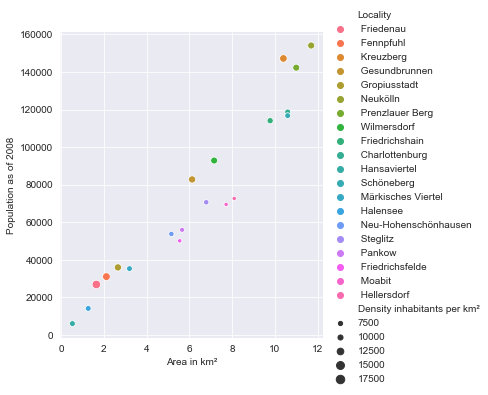

In [209]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.relplot(x="Area in km²", y="Population as of 2008", data=locality_sorted, kind="scatter", hue="Locality", size="Density inhabitants per km²")
plt.show()

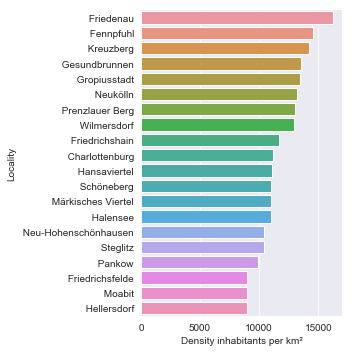

In [210]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(y="Locality", x="Density inhabitants per km²", data=locality_sorted, kind="bar")
plt.show()

### 6 Using the Foursquare API to explore the localities¶

In [195]:
# @hidden_cell
CLIENT_ID = '2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E' # your Foursquare ID
CLIENT_SECRET = 'ZKOYJBASSAXG3KQGM5OCQTURMSWXKA43R3QQL3D00PC2N1VJ' # your Foursquare Secret
VERSION = '20191227'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2HPNYCXJHXXMYHZ1MHPCURQXBLEZDCWG2B2P3X0HRS1MW45E
CLIENT_SECRET:ZKOYJBASSAXG3KQGM5OCQTURMSWXKA43R3QQL3D00PC2N1VJ


####  Select top 100 venues that are within a radius of 1000 meters

In [244]:
radius = 1000
LIMIT = 100


def getNearbyVenues(Latitude, Longitude, Locality, radius=1000):
    venues = []

    for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
        # create the API request URL
     url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
     results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
        locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
        
    
    
    venue_df = pd.DataFrame([item for venue in venues for item in venue])
    venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    
    
    
    return(venues_df)
venues_df.head(10)    


,Locality,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Adlershof,52.43779,13.54778,Mia Toscana,52.438327,13.549573,Italian Restaurant
1,Adlershof,52.43779,13.54778,Griechisches Restaurant Athen,52.434901,13.546680,Greek Restaurant
2,Adlershof,52.43779,13.54778,Olympia Greek Food,52.433982,13.538500,Greek Restaurant
3,Adlershof,52.43779,13.54778,McFIT,52.431000,13.549495,Gym / Fitness Center
4,Adlershof,52.43779,13.54778,Trattoria Il Mondo,52.434788,13.543176,Trattoria/Osteria
5,Adlershof,52.43779,13.54778,EDEKA,52.438157,13.548304,Supermarket
6,Adlershof,52.43779,13.54778,Deutsche Bank Filiale,52.436346,13.544170,Bank
7,Adlershof,52.43779,13.54778,Lidl,52.431322,13.548144,Supermarket
8,Adlershof,52.43779,13.54778,Posadas Steakhouse Bar,52.439702,13.553226,Steakhouse
9,Adlershof,52.43779,13.54778,DEVK,52.440111,13.550932,Insurance Office


In [219]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, locality in zip(ber_df['Latitude'], ber_df['Longitude'], ber_df['Locality']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            locality,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
    
    
    
  

In [220]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(venues_df.shape)
venues_df.head(10)

(3373, 7)


,Locality,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Adlershof,52.43779,13.54778,Mia Toscana,52.438327,13.549573,Italian Restaurant
1,Adlershof,52.43779,13.54778,Griechisches Restaurant Athen,52.434901,13.546680,Greek Restaurant
2,Adlershof,52.43779,13.54778,Olympia Greek Food,52.433982,13.538500,Greek Restaurant
3,Adlershof,52.43779,13.54778,McFIT,52.431000,13.549495,Gym / Fitness Center
4,Adlershof,52.43779,13.54778,Trattoria Il Mondo,52.434788,13.543176,Trattoria/Osteria
5,Adlershof,52.43779,13.54778,EDEKA,52.438157,13.548304,Supermarket
6,Adlershof,52.43779,13.54778,Deutsche Bank Filiale,52.436346,13.544170,Bank
7,Adlershof,52.43779,13.54778,Lidl,52.431322,13.548144,Supermarket
8,Adlershof,52.43779,13.54778,Posadas Steakhouse Bar,52.439702,13.553226,Steakhouse
9,Adlershof,52.43779,13.54778,DEVK,52.440111,13.550932,Insurance Office


In [245]:
ber_5_local_venues = getNearbyVenues(Locality=locality_data['Locality'],
                                   Latitude=locality_data['Latitude'],
                                   Longitude=locality_data['Longitude']
                                  )

In [ ]:
venues_df.groupby(["Locality"]).count()
#venues_df.value_counts()

#### Finding out unique venues

In [57]:
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))

There are 343 uniques categories.


In [165]:
# print out the list of categories
venues_df['Venue Category'].unique()[:10]

array(['Italian Restaurant', 'Greek Restaurant', 'Gym / Fitness Center',
       'Food Truck', 'Trattoria/Osteria', 'Hotel', 'Palace',
       'Korean Restaurant', 'Café', 'Sushi Restaurant'], dtype=object)

In [166]:
print (venues_df['Venue Category'].value_counts())

Supermarket                                 462
Café                                        279
Italian Restaurant                          224
German Restaurant                           145
Drugstore                                   145
Hotel                                       145
Park                                        142
Bakery                                      126
Ice Cream Shop                              104
Bus Stop                                    101
Bar                                          93
Coffee Shop                                  91
Gym / Fitness Center                         77
Pizza Place                                  75
Restaurant                                   73
Trattoria/Osteria                            67
Greek Restaurant                             64
Plaza                                        64
Asian Restaurant                             54
Fast Food Restaurant                         52
Tram Station                            

In [265]:
# check if the result contains any yoga studio
"Gym / Fitness Center" in venues_df['Venue Category'].unique()

True

In [266]:
# create a dataframe of top 15 categories
venues_df_top15 = venues_df['Venue Category'].value_counts()[0:15].to_frame(name='frequency')
venues_df_top15=venues_df_top15.reset_index()
venues_df_top15.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
venues_df_top15

,Venue Category,Frequency
0,Supermarket,265
1,Café,194
2,Italian Restaurant,130
3,Bakery,106
4,Hotel,92
5,Bus Stop,88
6,German Restaurant,79
7,Drugstore,79
8,Bar,68
9,Park,67


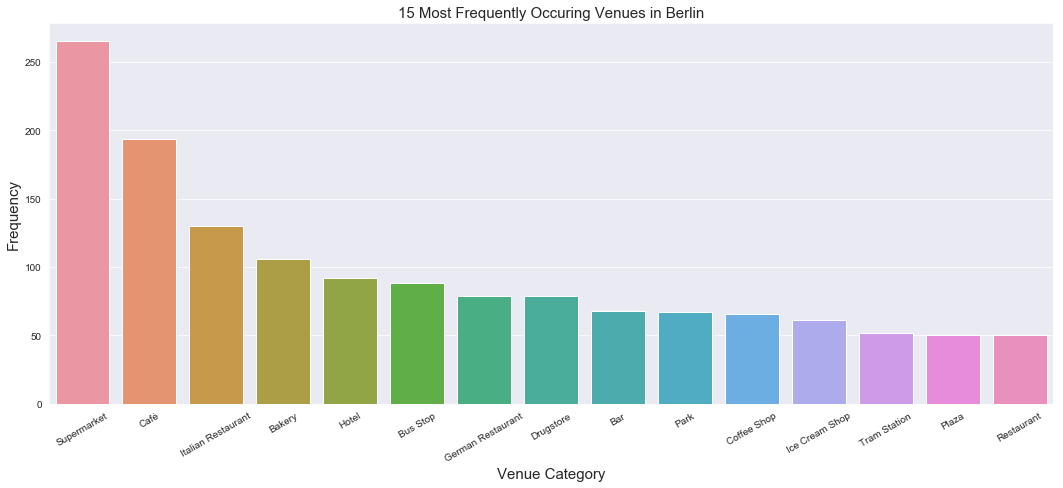

In [267]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=venues_df_top15)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('15 Most Frequently Occuring Venues in Berlin', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
#plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

### 7 Analyzing each locality

In [268]:
# one hot encoding
ber_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add locality column to the dataframe
ber_onehot['Locality'] = venues_df['Locality'] 

# move locality column to the first column
fixed_columns = [ber_onehot.columns[-1]] + list(ber_onehot.columns[:-1])
ber_onehot = ber_onehot[fixed_columns]


#### Groupping the rows by locality and by taking the mean of the frequency of occurrence of each category

In [269]:
ber_grouped = ber_onehot.groupby(["Locality"]).mean().reset_index()
ber_grouped.index = np.arange(1, len(ber_grouped)+1)
print(ber_grouped.shape)
ber_grouped


(96, 338)


,Locality,ATM,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bath House,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Liquor Store,Locksmith,Lounge,Market,Massage Studio,Medical Lab,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Racecourse,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Schnitzel Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restau

#### Creating a new data frame for a yoga studio

In [270]:
ber_yoga = ber_grouped[["Locality","Gym / Fitness Center"]]
ber_yoga.head()

,Locality,Gym / Fitness Center
1,Adlershof,0.045455
2,Alt-Hohenschönhausen,0.000000
3,Alt-Treptow,0.027778
4,Altglienicke,0.000000
5,Baumschulenweg,0.040000


### 8 Clustering localities
#### Running k-means algorithm to cluster the localities in Berlin into 3 clusters

In [271]:
# set number of clusters
kclusters = 3

ber_clustering = ber_yoga.drop(["Locality"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ber_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1],
      dtype=int32)

In [272]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each locality
ber_merged = ber_yoga.copy()

# add clustering labels
ber_merged["Cluster Labels"] = kmeans.labels_
ber_merged.head(20)

,Locality,Gym / Fitness Center,Cluster Labels
1,Adlershof,0.045455,2
2,Alt-Hohenschönhausen,0.000000,1
3,Alt-Treptow,0.027778,2
4,Altglienicke,0.000000,1
5,Baumschulenweg,0.040000,2
6,Biesdorf (Berlin),0.000000,1
7,Blankenburg (Berlin),0.000000,1
8,Blankenfelde,0.000000,1
9,Bohnsdorf,0.000000,1
10,Borsigwalde,0.000000,1


In [273]:
# merge ber_grouped with ber_data to add latitude/longitude for each locality
ber_merged = ber_merged.join(ber_df.set_index("Locality"), on="Locality")

print(ber_merged.shape)
# check the last columns
ber_merged.head()

(96, 5)


,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
1,Adlershof,0.045455,2,52.43779,13.54778
2,Alt-Hohenschönhausen,0.000000,1,52.54706,13.50055
3,Alt-Treptow,0.027778,2,52.49350,13.45711
4,Altglienicke,0.000000,1,52.42006,13.53969
5,Baumschulenweg,0.040000,2,52.46669,13.48840


In [274]:
num_top_venues = 5

for places in ber_grouped['Locality']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = ber_grouped[ber_grouped['Locality'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Adlershof%%%%%%%%
               Venue  Freq
0        Supermarket  0.14
1   Greek Restaurant  0.09
2          Pet Store  0.05
3   Sushi Restaurant  0.05
4  Convenience Store  0.05


%%%%%%%%%Alt-Hohenschönhausen%%%%%%%%
          Venue  Freq
0  Tram Station  0.09
1          Lake  0.07
2   Supermarket  0.07
3          Café  0.05
4        Bakery  0.05


%%%%%%%%%Alt-Treptow%%%%%%%%
                Venue  Freq
0                Café  0.08
1           Nightclub  0.07
2  Italian Restaurant  0.06
3            Bus Stop  0.04
4                Park  0.04


%%%%%%%%%Altglienicke%%%%%%%%
               Venue  Freq
0        Supermarket  0.44
1  German Restaurant  0.11
2     Discount Store  0.11
3      Bowling Alley  0.11
4   Greek Restaurant  0.11


%%%%%%%%%Baumschulenweg%%%%%%%%
                Venue  Freq
0         Supermarket  0.16
1                Café  0.08
2           Drugstore  0.08
3            Bus Stop  0.08
4  Italian Restaurant  0.08


%%%%%%%%%Biesdorf (Berlin)%%%%%%%%
       

                Venue  Freq
0                Café  0.08
1  Italian Restaurant  0.07
2                 Bar  0.06
3         Coffee Shop  0.05
4             Theater  0.03


%%%%%%%%%Köpenick%%%%%%%%
                  Venue  Freq
0                  Café  0.18
1     German Restaurant  0.08
2           Supermarket  0.08
3                 Hotel  0.05
4  Fast Food Restaurant  0.05


%%%%%%%%%Lankwitz%%%%%%%%
                Venue  Freq
0         Supermarket  0.14
1           Drugstore  0.07
2  Light Rail Station  0.07
3  Italian Restaurant  0.07
4            Bus Stop  0.07


%%%%%%%%%Lichtenberg (locality)%%%%%%%%
         Venue  Freq
0       Bakery  0.10
1  Supermarket  0.09
2        Hotel  0.05
3  Coffee Shop  0.05
4         Café  0.05


%%%%%%%%%Lichtenrade%%%%%%%%
                Venue  Freq
0        Soccer Field  0.11
1            Bus Stop  0.11
2                 ATM  0.05
3              Bakery  0.05
4  Italian Restaurant  0.05


%%%%%%%%%Lichterfelde (Berlin)%%%%%%%%
                Venu

                Venue  Freq
0                Café  0.09
1  Italian Restaurant  0.09
2  Chinese Restaurant  0.05
3   German Restaurant  0.05
4         Gas Station  0.05


%%%%%%%%%Wilhelmsruh%%%%%%%%
                Venue  Freq
0         Supermarket  0.33
1  Mexican Restaurant  0.07
2  Light Rail Station  0.07
3            Bus Stop  0.07
4   German Restaurant  0.07


%%%%%%%%%Wilhelmstadt%%%%%%%%
             Venue  Freq
0      Supermarket  0.33
1         Bus Stop  0.22
2  Automotive Shop  0.11
3            Plaza  0.11
4     Burger Joint  0.11


%%%%%%%%%Wilmersdorf%%%%%%%%
                Venue  Freq
0              Bakery  0.08
1               Hotel  0.06
2   German Restaurant  0.06
3         Supermarket  0.05
4  Italian Restaurant  0.05


%%%%%%%%%Wittenau%%%%%%%%
                Venue  Freq
0  Italian Restaurant  0.21
1         Supermarket  0.11
2         Post Office  0.05
3                Park  0.05
4       Big Box Store  0.05


%%%%%%%%%Zehlendorf (Berlin)%%%%%%%%
                V

In [275]:
# sort the results by Cluster Labels
print(ber_merged.shape)
ber_merged.sort_values(["Cluster Labels"], inplace=True)
ber_merged

(96, 5)


,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
88,Wartenberg (Berlin),0.076923,0,52.57503,13.51703
86,Waidmannslust,0.100000,0,52.60634,13.32050
61,Neu-Hohenschönhausen,0.074074,0,52.56512,13.50828
52,Mahlsdorf,0.071429,0,52.51297,13.61185
38,Hermsdorf (Berlin),0.095238,0,52.61488,13.31752
56,Marzahn,0.000000,1,52.54212,13.54389
55,Marienfelde,0.000000,1,52.41262,13.36732
54,Mariendorf,0.000000,1,52.43855,13.38779
53,Malchow (Berlin),0.000000,1,52.57842,13.48302
51,Lübars,0.000000,1,52.62014,13.35525


#### Visualizing the resulting clusters

In [292]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ber_merged['Latitude'], ber_merged['Longitude'], ber_merged['Locality'], ber_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [291]:
# save the map as HTML file
map_clusters.save('map_clusters.png')

### 9 Analyzing the clusters

In [285]:
# cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
88,Wartenberg (Berlin),0.076923,0,52.57503,13.51703
86,Waidmannslust,0.100000,0,52.60634,13.32050
61,Neu-Hohenschönhausen,0.074074,0,52.56512,13.50828
52,Mahlsdorf,0.071429,0,52.51297,13.61185
38,Hermsdorf (Berlin),0.095238,0,52.61488,13.31752


In [286]:
# red, cluster 0
ber_merged.loc[ber_merged['Cluster Labels'] == 0].shape

(5, 5)

In [287]:
# cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
56,Marzahn,0.000000,1,52.54212,13.54389
55,Marienfelde,0.000000,1,52.41262,13.36732
54,Mariendorf,0.000000,1,52.43855,13.38779
53,Malchow (Berlin),0.000000,1,52.57842,13.48302
51,Lübars,0.000000,1,52.62014,13.35525
48,Lichtenberg (locality),0.011628,1,52.51618,13.48087
95,Wittenau,0.000000,1,52.59852,13.33283
47,Lankwitz,0.000000,1,52.43895,13.35340
89,Wedding (Berlin),0.010000,1,52.54781,13.35473
45,Kreuzberg,0.010000,1,52.49382,13.38358


In [288]:
# purple, cluster 1
ber_merged.loc[ber_merged['Cluster Labels'] == 1].shape

(73, 5)

In [289]:
# cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2]

,Locality,Gym / Fitness Center,Cluster Labels,Latitude,Longitude
84,Tempelhof,0.024390,2,52.46076,13.38565
85,"Tiergarten, Berlin",0.020000,2,52.50993,13.36393
83,Tegel,0.017857,2,52.58934,13.27896
1,Adlershof,0.045455,2,52.43779,13.54778
77,Schöneberg,0.020408,2,52.48555,13.34293
67,Pankow (locality),0.029412,2,52.56925,13.40248
66,Oberschöneweide,0.027027,2,52.46237,13.51438
59,Märkisches Viertel,0.043478,2,52.59680,13.35831
58,Moabit,0.030000,2,52.52570,13.34005
57,Mitte (locality),0.040000,2,52.52119,13.42414


In [290]:
# mint, cluster 2
ber_merged.loc[ber_merged['Cluster Labels'] == 2].shape

(18, 5)